In [7]:
def percent_difference(base_price, current_price):
    """
    Calculate the percent difference between the base price and the current price.

    Parameters:
    base_price (float): The base price.
    current_price (float): The current price.

    Returns:
    float: The percent difference expressed as a decimal.
    """
    if base_price == 0:
        raise ValueError("Base price cannot be zero.")
    
    difference = current_price - base_price
    percent_diff = difference / base_price
    return percent_diff

# Example usage
base_price = 120
current_price = 100
print(f"Percent Difference: {percent_difference(base_price, current_price)}")

Percent Difference: -0.16666666666666666


In [8]:
def determine_price_change(base_price, current_price):
    """
    Determine if the price has increased or decreased based on the percent difference.

    Parameters:
    base_price (float): The base price.
    current_price (float): The current price.

    Returns:
    str: A message indicating whether the price increased or decreased and by what percent.
    """
    percent_diff = percent_difference(base_price, current_price)
    
    if percent_diff > 0:
        return f"The price increased by {percent_diff:.2%}."
    elif percent_diff < 0:
        return f"The price decreased by {percent_diff:.2%}."
    else:
        return "There is no change in the price."

# Example usage
base_price = 100
current_price = 120
print(determine_price_change(base_price, current_price))

base_price = 100
current_price = 80
print(determine_price_change(base_price, current_price))

base_price = 100
current_price = 100
print(determine_price_change(base_price, current_price))

The price increased by 20.00%.
The price decreased by -20.00%.
There is no change in the price.


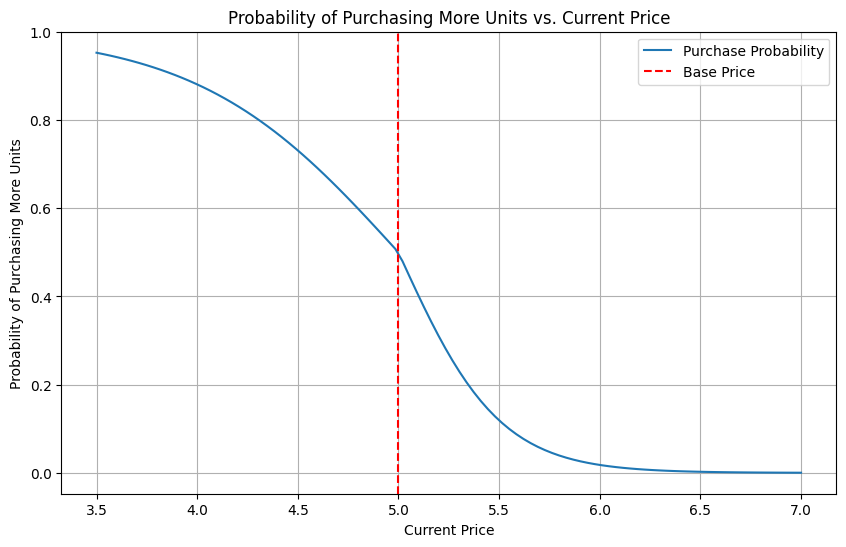

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def percent_difference(base_price, current_price):
    """
    Calculate the percent difference between the base price and the current price.

    Parameters:
    base_price (float): The base price.
    current_price (float): The current price.

    Returns:
    float: The percent difference expressed as a decimal.
    """
    if base_price == 0:
        raise ValueError("Base price cannot be zero.")
    
    difference = current_price - base_price
    percent_diff = difference / base_price
    return percent_diff

def logistic(x):
    """
    Logistic function to map any real-valued number into the range (0, 1).

    Parameters:
    x (float): The input value.

    Returns:
    float: The output of the logistic function.
    """
    return 1 / (1 + math.exp(-x))

def purchase_probability(base_price, current_price, sensitivity_increase=10, sensitivity_decrease=10):
    """
    Calculate the probability that an agent will purchase more or fewer units based on the price change.

    Parameters:
    base_price (float): The base price.
    current_price (float): The current price.
    sensitivity_increase (float): The sensitivity factor for price increases.
    sensitivity_decrease (float): The sensitivity factor for price decreases.

    Returns:
    float: The probability of purchasing more units (for a price decrease) or fewer units (for a price increase).
    """
    percent_diff = percent_difference(base_price, current_price)
    
    # Use the logistic function to model the probability
    if percent_diff < 0:
        # For a price decrease, the probability of purchasing more units increases
        probability = logistic(-percent_diff * sensitivity_decrease)  # Adjust the sensitivity with the scaling factor
    else:
        # For a price increase, the probability of purchasing more units decreases
        probability = logistic(-percent_diff * sensitivity_increase)  # Adjust the sensitivity with the scaling factor
    
    return probability


# Parameters
base_price = 5.00
price_range = np.linspace(3.50, 7.00, 100)
sensitivity_increase = 20
sensitivity_decrease = 10

# Calculate probabilities
probabilities = [purchase_probability(base_price, price, sensitivity_increase, sensitivity_decrease) for price in price_range]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(price_range, probabilities, label='Purchase Probability')
plt.axvline(base_price, color='r', linestyle='--', label='Base Price')
plt.xlabel('Current Price')
plt.ylabel('Probability of Purchasing More Units')
plt.title('Probability of Purchasing More Units vs. Current Price')
plt.legend()
plt.grid(True)
plt.show()

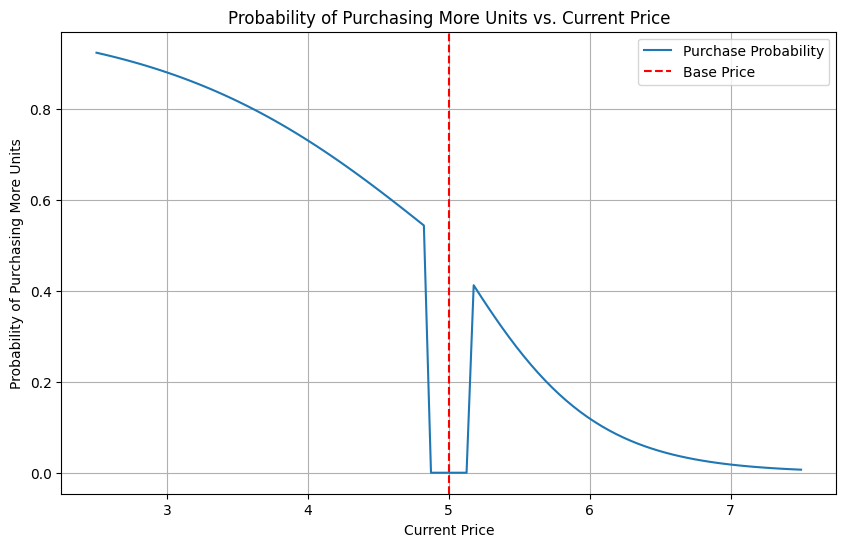

In [38]:
import math
import matplotlib.pyplot as plt
import numpy as np

def logistic(x):
    """
    Logistic function to map any real-valued number into the range (0, 1).

    Parameters:
    x (float): The input value.

    Returns:
    float: The output of the logistic function.
    """
    return 1 / (1 + math.exp(-x))

def purchase_probability(base_price, current_price, sensitivity_increase=10, sensitivity_decrease=10, threshold=0.01):
    """
    Calculate the probability that an agent will purchase more or fewer units based on the price change.

    Parameters:
    base_price (float): The base price.
    current_price (float): The current price.
    sensitivity_increase (float): The sensitivity factor for price increases.
    sensitivity_decrease (float): The sensitivity factor for price decreases.
    threshold (float): The threshold around zero percent difference where the probability is zero.

    Returns:
    float: The probability of purchasing more units (for a price decrease) or fewer units (for a price increase).
    """
    percent_diff = percent_difference(base_price, current_price)
    
    # Handle the threshold around zero percent difference
    if abs(percent_diff) < threshold:
        return 0.0
    
    # Use the logistic function to model the probability
    if percent_diff < 0:
        # For a price decrease, the probability of purchasing more units increases
        probability = logistic(-percent_diff * sensitivity_decrease)  # Adjust the sensitivity with the scaling factor
    else:
        # For a price increase, the probability of purchasing more units decreases
        probability = logistic(-percent_diff * sensitivity_increase)  # Adjust the sensitivity with the scaling factor
    
    return probability

def percent_difference(base_price, current_price):
    """
    Calculate the percent difference between the base price and the current price.

    Parameters:
    base_price (float): The base price.
    current_price (float): The current price.

    Returns:
    float: The percent difference expressed as a decimal.
    """
    if base_price == 0:
        raise ValueError("Base price cannot be zero.")
    
    difference = current_price - base_price
    percent_diff = difference / base_price
    return percent_diff

# Parameters
base_price = 5.00
price_range = np.linspace(2.50, 7.50, 100)
sensitivity_increase = 10
sensitivity_decrease = 5
threshold = 0.03  # 1% threshold

# Calculate probabilities
probabilities = [purchase_probability(base_price, price, sensitivity_increase, sensitivity_decrease, threshold) for price in price_range]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(price_range, probabilities, label='Purchase Probability')
plt.axvline(base_price, color='r', linestyle='--', label='Base Price')
plt.xlabel('Current Price')
plt.ylabel('Probability of Purchasing More Units')
plt.title('Probability of Purchasing More Units vs. Current Price')
plt.legend()
plt.grid(True)
plt.show()